In [178]:
import pandas as pd
import numpy as np
import mitosheet
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.metrics import accuracy_score

## 1- Abro train

In [206]:
train = pd.read_parquet(r"C:\Users\ornal\Desktop\CursoDataScience\Datathon\train1.parquet")

## 2- Preparando variables para entrenar el modelo
#### X: train sin la columna 'category_price'
#### y: columna 'category_price' de train

#### X_train: porciento de X para entrenamiento
#### X_test: porciento de X para test
#### y_train: porciento de y para entrenamiento
#### y_test: porciento de y para test

In [218]:
columnas_x = ['region', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed','dogs_allowed', 'smoking_allowed', 'wheelchair_access',
               'electric_vehicle_charge', 'comes_furnished', 'laundry_options','parking_options', 'state']
columna_y = ['category_price']

In [219]:
X = train.loc[:,columnas_x]
y = train.loc[:,columna_y]

In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,train_size=0.7)

In [222]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((241158, 14), (103354, 14), (241158, 1), (103354, 1))

## 3- DecisionTreeClassifier

In [226]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
clf = DecisionTreeClassifier(max_depth = 5000, random_state = 22) 
clf.fit(X_train.values,y_train.values)
y_pred = clf.predict(X_test.values)

In [227]:
y_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [229]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

## 4- Ejecuto y Verifico las métricas

In [230]:
print('Feature importance: ', clf.feature_importances_)
print('Accuracy: ', accuracy_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test, y_pred))

Feature importance:  [0.21270675 0.02420957 0.28545198 0.02989283 0.03357738 0.01117422
 0.0117397  0.01892919 0.0090337  0.00155472 0.01009935 0.1008366
 0.04001176 0.21078225]
Accuracy:  0.9221026762389457
Recall:  0.9155109298190566
F1 Score:  0.9157695406086857


## 5- Matriz Confusion

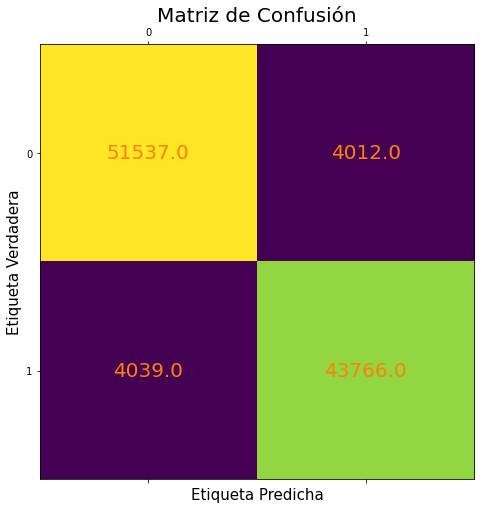

In [240]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

text_kwargs = dict(fontsize=20, color='C1')

fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center', **text_kwargs)

## 6- Ejecuto los datos del test

In [241]:
test = pd.read_parquet(r"C:\Users\ornal\Desktop\CursoDataScience\Datathon\test1.parquet")

In [242]:
y_pred_final = clf.predict(test.values)

In [245]:
df = pd.DataFrame(y_pred_final,columns=['pred'])

## 7- Salvo la respuesta

In [251]:
df.to_csv(r"C:\Users\ornal\Desktop\CursoDataScience\Datathon\soyornaldo.csv", index=False)